In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [14]:
df_train = pd.read_csv('./train_v2.csv')
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [15]:
labels = df_train['tags'].apply(lambda x: x.split(' '))

In [16]:
labels = df_train['tags'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1

data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-label-dist')

In [17]:
# Co-occurence Matrix
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0
        cy = 0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = cy / c

data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()))]
layout=go.Layout(height=800, width=800, title='Co-occurence matrix of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-com')

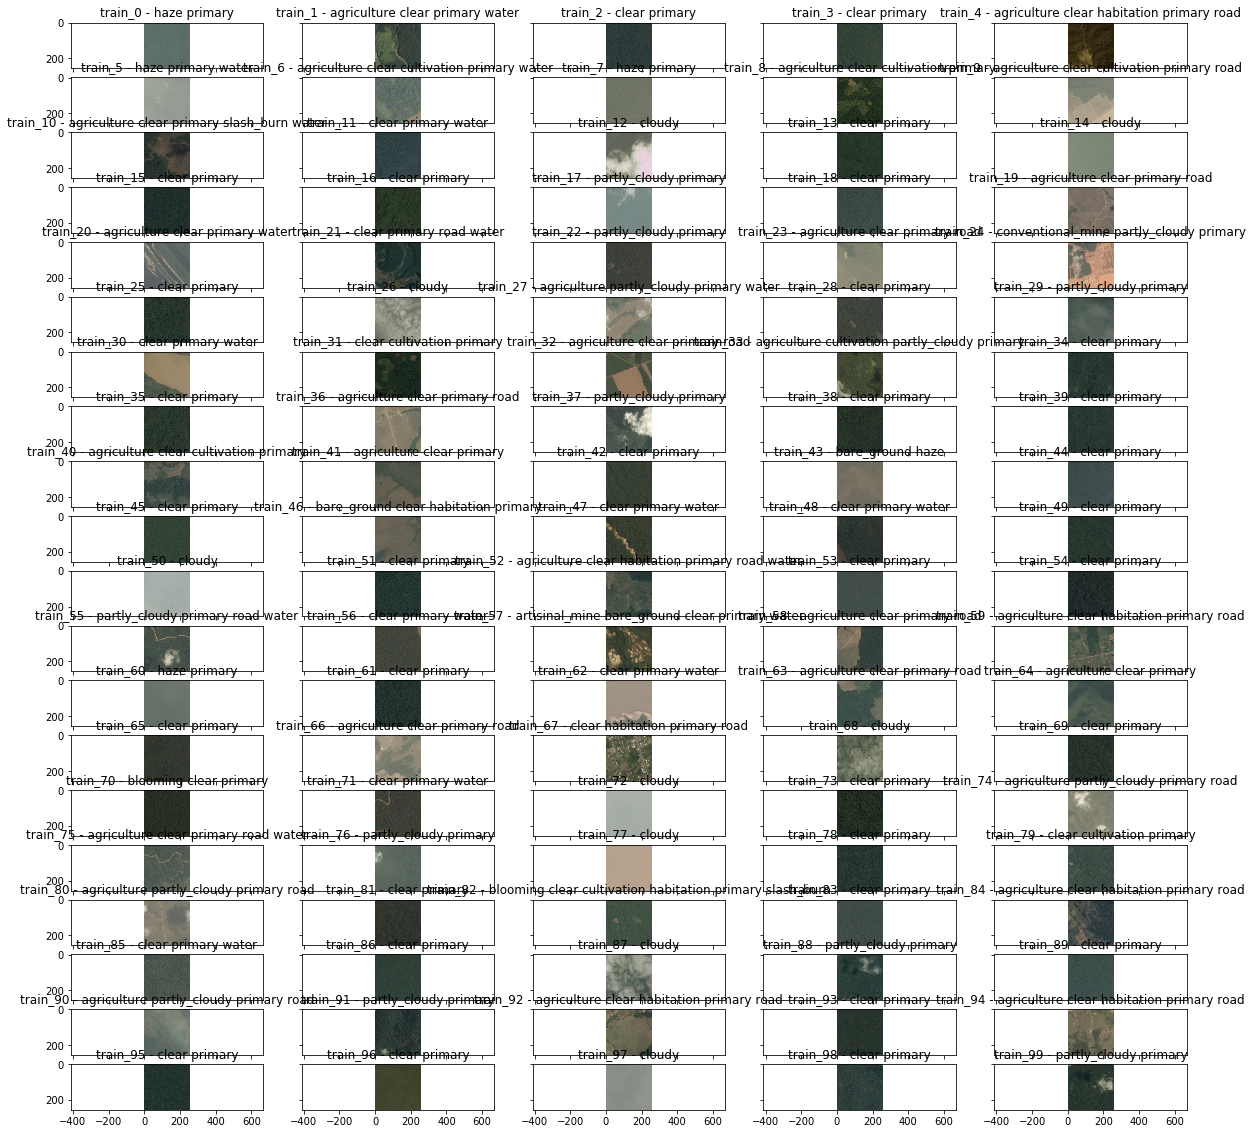

In [36]:
import cv2

# show the first 100 images 
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(20,5, sharex='col', sharey='row', figsize=(20, 20))
i = 0
for f, l in df_train[:100].values:
    img = cv2.imread('./train-jpg/{}.jpg'.format(f))
    ax[i // 5, i % 5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 5, i % 5].set_title('{} - {}'.format(f, l))
    i += 1
    
plt.show()

In [40]:
#get the whole type of the tags
df_train

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [51]:
count_line_num1 = sum(1 for line in open('./train_v2.csv'))
count_line_num1 -= 1
count_line = 0
matrix_train = np.empty([count_line_num1, 2], dtype=object)
with open('./train_v2.csv') as in_file:
    in_file.readline()
    for line in in_file.readlines():
        newline = line.split(',')
        #remove /n for each row
        newline[-1] = newline[-1].strip()
        matrix_train[count_line] = newline
        count_line += 1
#to deal with missing data
matrix_train[matrix_train == ''] = 'nan'
matrix_train
#get the length of unique labels
unique_items = np.unique(matrix_train[:, 1])
print ("The total # of combination of the label:", len(unique_items))

The total # of combination of the label: 449
